In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('path to local MGWR repository copy')


import gstools as gs
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns


In [ ]:
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)
#第一个数据

model = gs.Gaussian(dim=2, var=1,len_scale=3)
srf = gs.SRF(model,mean=0.)
srf((x, y), mesh_type='structured')
B0=srf((x, y), mesh_type='structured',seed=100)



In [ ]:
# #运行1000次 p=52,  coverage=0
# # 将数据转换为适合随机森林模型的格式
# X = np.column_stack([XX.ravel(), YY.ravel()])
# y = B0.ravel()

# # 在目标值中添加人为误差
# y_with_noise = y + np.random.normal(0.2, 0.1, y.shape) 

# # y_with_noise = y 

# lam = 5  # 泊松分布的 λ 参数
# # noise = np.random.poisson(lam,y.shape). + np.random.laplace(0,0.01,  y_pred_full.shape)

# # 训练随机森林模型
# # rf = RandomForestRegressor(n_estimators=100, random_state=42)
# def process_data_with_randomness(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     rf = RandomForestRegressor(n_estimators=100)
#     rf.fit(X_train, y_train)
#     # 进行预测
#     y_pred = rf.predict(X_test)
#     # 计算均方误差
#     mse = mean_squared_error(y_test, y_pred)
#     # print(f'随机森林模型的均方误差: {mse}')
#     # 生成预测结果
#     y_pred_full = rf.predict(X).reshape(XX.shape)
#     # noise=np.random.normal(0.3, 0.1, y_pred_full.shape) + np.random.laplace(0,0.02,  y_pred_full.shape)
#     noise=np.random.laplace(0,0.05,  y_pred_full.shape)

#     # 在预测结果中添加人为误差
#     y_pred_full_with_noise = y_pred_full + noise

#     y_pred_full_with_noise_column = y_pred_full_with_noise.ravel()
#     return y_pred_full_with_noise_column

# # 收集所有的 processed_values
# all_processed_values = []

# # 运行过程 1000 次并存储结果
# for i in range(1, 1001):
#     print(i)
#     processed_values = process_data_with_randomness(X, y_with_noise)
#     all_processed_values.append(pd.Series(processed_values, name=f'Out{i}'))

# # Initialize the dataframe to store results
# results_df = pd.DataFrame()
# # 将所有列一次性连接到 results_df 中
# results_df = pd.concat(all_processed_values, axis=1)
# results_df.to_csv("repro-out/pred_noisy_1000_-02+01.csv", index=False)
# # 检查结果
# print(results_df)


In [ ]:
#运行1000次
# 将数据转换为适合随机森林模型的格式
X = np.column_stack([XX.ravel(), YY.ravel()])
y = B0.ravel()
print(np.std(y))

# 在目标值中添加人为误差
y_with_noise = y + np.random.normal(0.01, 0.01, y.shape) 

y_with_noise = y 

lam = 5  # 泊松分布的 λ 参数
# noise = np.random.poisson(lam,y.shape). + np.random.laplace(0,0.01,  y_pred_full.shape)

# 训练随机森林模型
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
def process_data_with_randomness(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    # 进行预测
    y_pred = rf.predict(X_test)
    # 计算均方误差
    mse = mean_squared_error(y_test, y_pred)
    # print(f'随机森林模型的均方误差: {mse}')
    # 生成预测结果
    y_pred_full = rf.predict(X).reshape(XX.shape)


    # noise=np.random.normal(0.09, 0.01, y_pred_full.shape) + np.random.laplace(0,0.3,  y_pred_full.shape) *0.02
    # noise=np.random.normal(0.02, 0.01, y_pred_full.shape) + 0.2* np.random.laplace(0.02,0.01,  y_pred_full.shape) 
    noise=np.random.laplace(0.15,0.02, y_pred_full.shape)+  np.random.poisson(0.05,y_pred_full.shape)+np.random.normal(0.1, 0.02, y_pred_full.shape)
    # noise=np.random.laplace(0,0.05,  y_pred_full.shape)
    # 在预测结果中添加人为误差
    y_pred_full_with_noise = y_pred_full + noise

    y_pred_full_with_noise_column = y_pred_full_with_noise.ravel()
    return y_pred_full_with_noise_column

# 收集所有的 processed_values
all_processed_values = []

# 运行过程 1000 次并存储结果

indexForCalu=1001
for i in range(1, indexForCalu):
    print(i)
    processed_values = process_data_with_randomness(X, y_with_noise)
    all_processed_values.append(pd.Series(processed_values, name=f'Out{i}'))

# Initialize the dataframe to store results
results_df = pd.DataFrame()
# 将所有列一次性连接到 results_df 中
results_df = pd.concat(all_processed_values, axis=1)
results_df.to_csv("repro-out/pred_noisy_1000_-02+01.csv", index=False)
# 检查结果
print(results_df)


0.8267837058081482
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
2

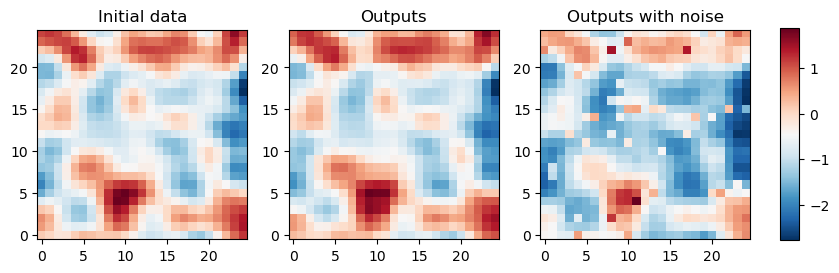

In [ ]:
out0 = pd.read_csv("pred_nonoisy_initial.csv")
outs = pd.read_csv("repro-out/pred_noisy_1000_-02+01.csv")
clustered_Out0 = out0.values.reshape(B0.shape)
clustered_Out1 = outs["Out1"].values.reshape(B0.shape)

# 可视化
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 原始随机场
im0 = axes[0].imshow(B0, origin='lower', cmap='RdBu_r')
axes[0].set_title('Initial data')

im1 = axes[1].imshow(clustered_Out0, origin='lower', cmap='RdBu_r')
axes[1].set_title('Outputs')

im2 = axes[2].imshow(clustered_Out1, origin='lower', cmap='RdBu_r')
axes[2].set_title('Outputs with noise')

# 调整子图间距，避免颜色条与图片重叠
fig.subplots_adjust(right=0.6)

# 创建一个公共颜色条
cbar_ax = fig.add_axes([0.62, 0.23, 0.013, 0.53])  # [左, 下, 宽, 高]
cbar = fig.colorbar(im0, cax=cbar_ax, orientation='vertical')

plt.show()

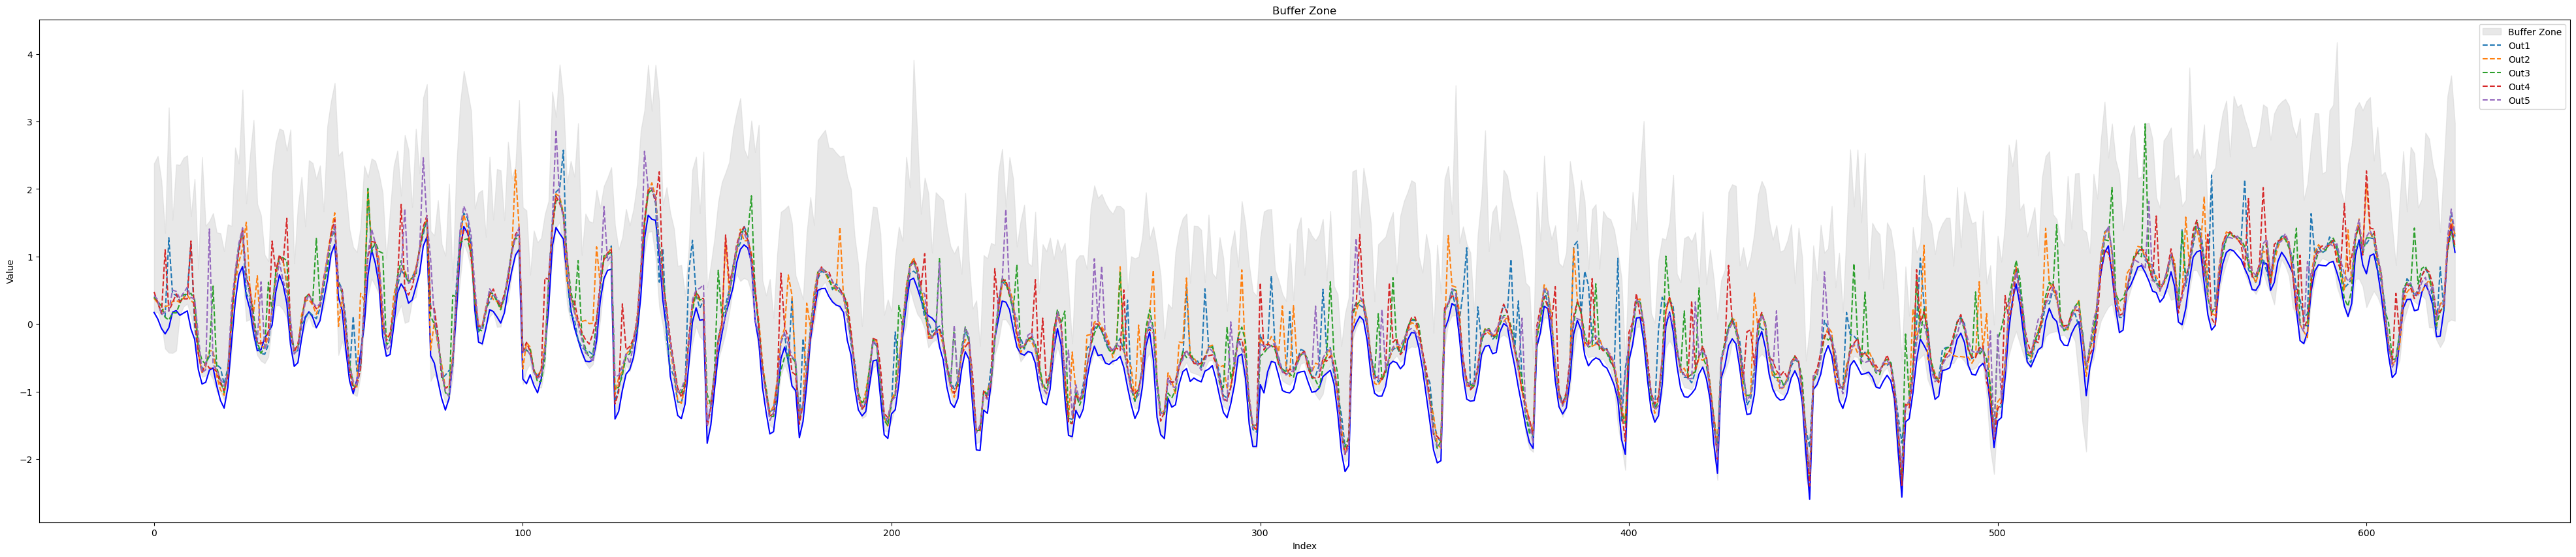

56.48


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from itertools import combinations

import warnings 

warnings.filterwarnings("ignore")


# 生成示例数据
# df = pd.read_csv("./test-out/s9_cluster.csv")
# 生成示例数据
# df = pd.read_csv("./repro-out/pred_noisy_1000.csv")
df = pd.read_csv("./repro-out/pred_noisy_1000_-02+01.csv")

out0 =  pd.read_csv("pred_nonoisy_initial.csv")
# df["Out0"]=out0
x= df.index
data = df
# data = data.iloc[:, 1:1001]
# def calculate_proportion(values, lower_bound, upper_bound):
#     results = {}
#     common_count = 0
#     total_count = len(values)
#     for key, value in values.items():
#         if ((value >= lower_bound) & (value <= upper_bound)).any():
#             common_count += 1
        
#     common_ratio = common_count / total_count
#     return common_ratio *100

def calculate_proportion(values, lower_bound, upper_bound):
    # 确保所有输入都是 NumPy 数组
    if isinstance(values, pd.Series):
        values = values.to_numpy().flatten()
    if isinstance(lower_bound, pd.Series):
        lower_bound = lower_bound.to_numpy().flatten()
    if isinstance(upper_bound, pd.Series):
        upper_bound = upper_bound.to_numpy().flatten()
    
    common_count = 0
    total_count = len(values)
    
    for value, lb, ub in zip(values, lower_bound, upper_bound):
        # print(value, lb, ub)
        if lb <= value <= ub:
            common_count += 1
            
    return common_count / total_count*100

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# 初始化缓冲区上下界的数组
buffer_upper = []
buffer_lower = []


# 获取列的范围
start_col = data.columns.get_loc("Out1")
end_col = data.columns.get_loc(f"Out{indexForCalu-1}")+1

# 对每一行进行正态性检验并计算缓冲区
for i in range(data.shape[0]):
    # row_data = data.iloc[i, start_col:end_col]    
    row_data = data.iloc[i, start_col:end_col]    
    buffer_upper.append(max(row_data))
    buffer_lower.append(min(row_data))

# 将缓冲区上下界转换为数组
buffer_upper = np.array(buffer_upper)
buffer_lower = np.array(buffer_lower)

# 生成x轴
x = np.arange(data.shape[0])
# 绘制缓冲区范围
plt.figure(figsize=(50, 10))
# 绘制Out0数据
plt.plot(x,out0, color='blue')

plt.fill_between(x, buffer_lower, buffer_upper, color='lightgray', alpha=0.5, label='Buffer Zone')

# 绘制部分数据列以示例
for i in range(5):
    plt.plot(x, data[f"Out{i+1}"], label=f'Out{i+1}', linestyle='--')
 
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Buffer Zone')
plt.show()
# 计算Out0在缓冲区内的比例
probability_within_buffer = calculate_proportion(out0.values,buffer_lower,buffer_upper)
print(probability_within_buffer)






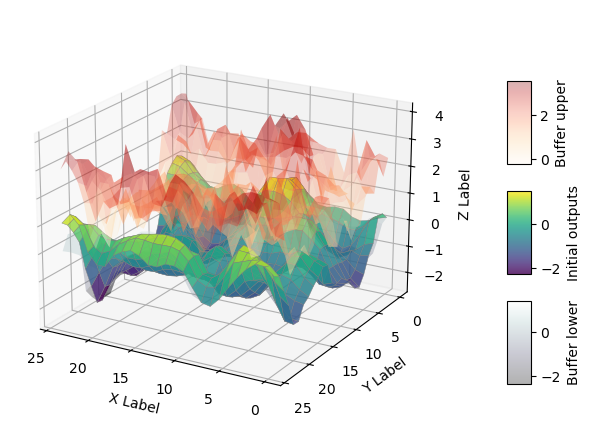

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



# 初始化 predictions 为字典
array = out0.values
predictions = {'Shape_Out_0': array.reshape(25, 25)}

# 绘制三维图
fig = plt.figure(figsize=(12, 5.5))
ax = fig.add_subplot(111, projection='3d')

# 假设我们绘制 predictions 中的第一个 reshaped 数组
X, Y = np.meshgrid(np.arange(25), np.arange(25))
Z = predictions['Shape_Out_0']

# 确保缓冲区与 reshaped 数据形状一致
buffer_upper_reshape = buffer_upper.reshape(25, 25)
buffer_lower_reshape = buffer_lower.reshape(25, 25)

# 绘制曲面
surf = ax.plot_surface(X, Y, Z, cmap='viridis',color="grey", alpha=0.8, linewidth=0.3)

# 绘制缓冲区上下界，增加透明度使其更明显
lower_surf = ax.plot_surface(X, Y, buffer_lower_reshape, cmap='bone', alpha=0.3, linewidth=0.2)
upper_surf = ax.plot_surface(X, Y, buffer_upper_reshape, cmap='OrRd', alpha=0.3, linewidth=0.2)

# 增加垂直线以更明显显示波动范围
# for i in range(25):
#     for j in range(25):
#         ax.plot([X[i, j], X[i, j]], [Y[i, j], Y[i, j]], [buffer_lower_reshape[i, j], buffer_upper_reshape[i, j]], color='k', alpha=0.5)

# 调整视角
ax.view_init(elev=20, azim=120)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 创建独立的颜色条轴并调整位置
fig.subplots_adjust(right=0.9)
cbar_ax1 = fig.add_axes([0.75, 0.6, 0.02, 0.15])
cbar_ax2 = fig.add_axes([0.75, 0.4, 0.02, 0.15])
cbar_ax3 = fig.add_axes([0.75, 0.2, 0.02, 0.15])

cbar1 = fig.colorbar(surf, cax=cbar_ax2)
cbar1.set_label('Initial outputs')
cbar2 = fig.colorbar(upper_surf, cax=cbar_ax1)
cbar2.set_label('Buffer upper')
cbar3 = fig.colorbar(lower_surf, cax=cbar_ax3)
cbar3.set_label('Buffer lower')

plt.show()

In [ ]:
# 生成所需列的列名列表
df['Out0']=out0

column_names = [f'Out{i}' for i in range(0, indexForCalu)]
data_df = df[column_names]


计算 ResidualError 统计量:
ResidualError 95%置信区间: (0.08904143326854089, 0.1466994364301711)
总误差: (0.12548527189999856, 0.18599445011302843); 随机误差: (0.08904143326854089, 0.1466994364301711)
随机误差ResidualError在总误差内的概率: 0.24，覆盖率: 35.06%


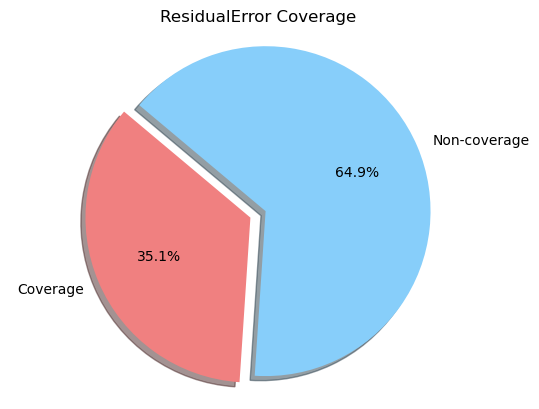

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from itertools import combinations

def calculate_coverage(interval1, interval2):
    L1, U1 = interval1
    L2, U2 = interval2
    L_overlap, U_overlap = max(L1, L2), min(U1, U2)
    if L_overlap > U_overlap:
        return 0.0
    overlap_length = U_overlap - L_overlap
    length1, length2 = U1 - L1, U2 - L2
    coverage = overlap_length / length1
    return coverage 

def calculate_statistics(data):
    return np.mean(data), np.var(data), np.std(data)

def calculate_confidence_interval(values, alpha=0.05):
    values = np.sort(values)
    lower_bound = np.percentile(values, alpha / 2 * 100)
    upper_bound = np.percentile(values, (1 - alpha / 2) * 100)
    return lower_bound, upper_bound

# def calculate_proportion(values, lower_bound, upper_bound):
#     return np.sum((values >= lower_bound) & (values <= upper_bound)) / len(values)
def calculate_proportion(values, lower_bound, upper_bound):
    # 确保 values 是一个一维数组或列表
    values = np.asarray(values).flatten()
    
    common_count = 0
    total_count = len(values)
    for value in values:
        if lower_bound <= value <= upper_bound:
            common_count += 1
            
    return common_count / total_count

def lins_ccc(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)
    var_x, var_y = np.var(x), np.var(y)
    cov_xy = np.mean((x - mean_x) * (y - mean_y))
    rho = cov_xy / np.sqrt(var_x * var_y)
    return (2 * rho * np.sqrt(var_x) * np.sqrt(var_y)) / (var_x + var_y + (mean_x - mean_y)**2)

def calcu_ResidualError(x, y):
    return np.mean((x - y)**2)

def monteCarloMethod(num_samples, data, stat_type):
    monteCarlo_values = []
    sampled_combinations = [np.random.choice(data.columns, 2, replace=False) for _ in range(num_samples)]
    for i, j in sampled_combinations:
        if stat_type == "R2":
            monteCarlo_values.append(r2_score(data[i], data[j]))
        elif stat_type == "Lin's CCC":
            monteCarlo_values.append(lins_ccc(data[i], data[j]))
        elif stat_type == "ResidualError":
            monteCarlo_values.append(calcu_ResidualError(data[i], data[j]))
    return monteCarlo_values



# 定义要计算的统计量类型
# stat_types = ["R2", "Lin's CCC", "ResidualError"]
stat_types = ["R2", "Lin's CCC", "ResidualError"]

for stat_type in stat_types:
    print(f"\n计算 {stat_type} 统计量:") 
    # 直接使用data_df进行蒙特卡洛抽样并计算统计量-------随机误差
    monteCarlo_values = monteCarloMethod(10000, data_df, stat_type)
    ci_low, ci_high = calculate_confidence_interval(monteCarlo_values)
    print(f"{stat_type} 95%置信区间: ({ci_low}, {ci_high})")
    
    # 计算原始数据与复现数据之间的统计检验量-------总误差
    if stat_type == "R2":
        real_values = [r2_score(data_df['Out0'], data_df[f'Out{i}']) for i in range(1, indexForCalu)]
    elif stat_type == "Lin's CCC":
        real_values = [lins_ccc(data_df['Out0'], data_df[f'Out{i}']) for i in range(1, indexForCalu)]
    elif stat_type == "ResidualError":
        real_values = [calcu_ResidualError(data_df['Out0'], data_df[f'Out{i}']) for i in range(1, indexForCalu)]

    low, high = calculate_confidence_interval(real_values)
    ratio_original = calculate_proportion(monteCarlo_values, low, high)
    coverage = calculate_coverage((low, high), (ci_low, ci_high))
    
    print(f"总误差: {(low, high)}; 随机误差: {(ci_low, ci_high)}")
    print(f"随机误差{stat_type}在总误差内的概率: {ratio_original:.2f}，覆盖率: {coverage*100:.2f}%")
    
    # 绘制覆盖率的饼图
    fig, ax = plt.subplots()
    labels = ['Coverage', 'Non-coverage']
    sizes = [coverage, 1-coverage]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # 突出显示覆盖率
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=140)
    ax.axis('equal')
    plt.title(f'{stat_type} Coverage')
    plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
## --Prediction--
# 定义计算指标的函数
def calculate_metrics(true_values, predictions, p):
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    r2 = r2_score(true_values, predictions)
    n = len(true_values)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    sse = np.sum((true_values - predictions) ** 2)
    aic = n * np.log(sse / n) + 2 * (p)
    return mae, mape, rmse, r2, adj_r2, aic

p = 7  # 根据你的模型的自变量数量调整å
metrics = calculate_metrics(df['Out0'], df['Out10'], p)


# 输出结果
print("Metrics: MAE, MAPE, RMSE, R2, Adj.R2, AIC")
print(metrics)

Metrics: MAE, MAPE, RMSE, R2, Adj.R2, AIC
(0.30799075861097924, 115.01175753622104, 0.4010483584476614, 0.7406513347971783, 0.7377089674447961, -1128.09158039243)


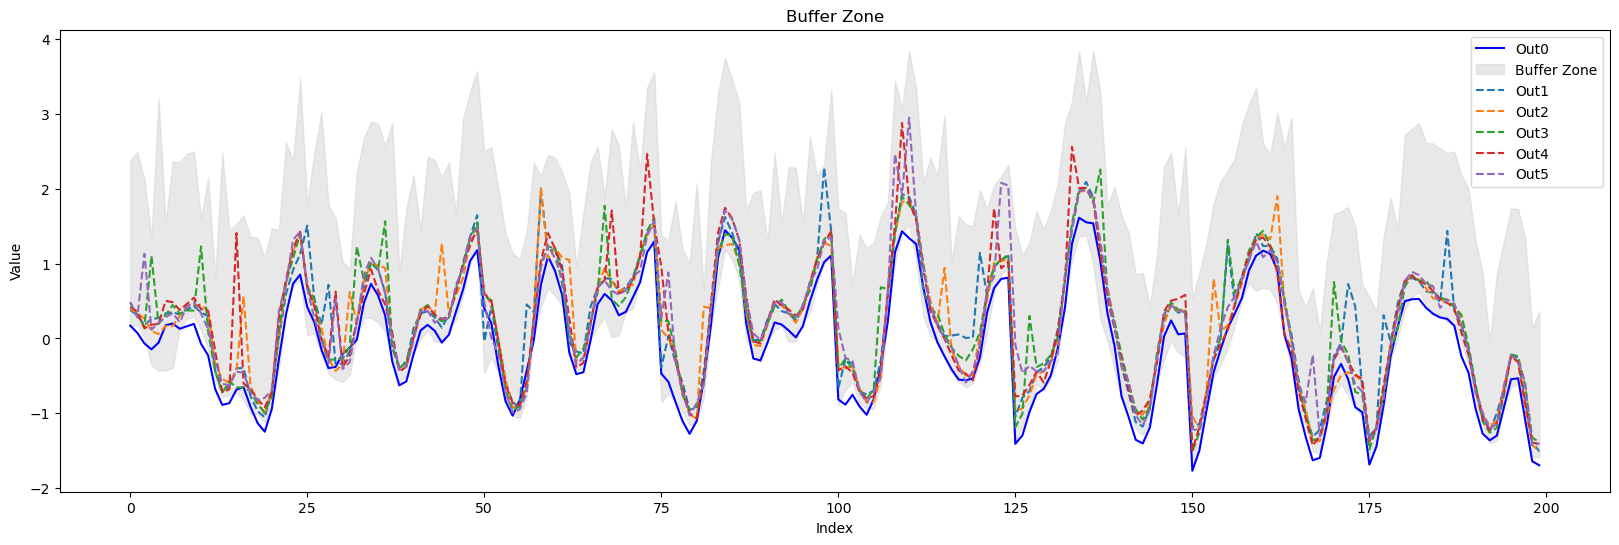

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score
# import warnings

# warnings.filterwarnings("ignore")

# # 读取数据
# df = pd.read_csv("./repro-out/pred_noisy_1000_-02+01.csv")
# out0 = pd.read_csv("pred_nonoisy_initial.csv")

# # 取前200行数据
# data = df.iloc[:200, :]
# out0 = out0.iloc[:200, :]

# # 定义计算比例的函数
# def calculate_proportion(values, lower_bound, upper_bound):
#     if isinstance(values, pd.Series):
#         values = values.to_numpy().flatten()
#     if isinstance(lower_bound, pd.Series):
#         lower_bound = lower_bound.to_numpy().flatten()
#     if isinstance(upper_bound, pd.Series):
#         upper_bound = upper_bound.to_numpy().flatten()
    
#     common_count = 0
#     total_count = len(values)
    
#     for value, lb, ub in zip(values, lower_bound, upper_bound):
#         if lb <= value <= ub:
#             common_count += 1
            
#     return common_count / total_count * 100

# # 提取数据列
# testData = data.iloc[:, 1:1001]

# # 初始化缓冲区上下界的数组
# buffer_upper = []
# buffer_lower = []

# # 对每一行进行处理并计算缓冲区
# for i in range(data.shape[0]):
#     row_data = data.iloc[i, 1:1001]
#     buffer_upper.append(row_data.max())
#     buffer_lower.append(row_data.min())

# # 将缓冲区上下界转换为数组
# buffer_upper = np.array(buffer_upper)
# buffer_lower = np.array(buffer_lower)

# # 生成x轴
# x = np.arange(testData.shape[0])

# # 绘制缓冲区范围
# plt.figure(figsize=(20, 6))
# # 绘制Out0数据
# plt.plot(x, out0.values.flatten(), color='blue', label='Out0')

# plt.fill_between(x, buffer_lower, buffer_upper, color='lightgray', alpha=0.5, label='Buffer Zone')

# # 绘制部分数据列以示例
# for i in range(5):
#     plt.plot(x, testData.iloc[:, i], label=f'Out{i+1}', linestyle='--')

# plt.legend()
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Buffer Zone')
# plt.show()

# # 计算Out0在缓冲区内的比例


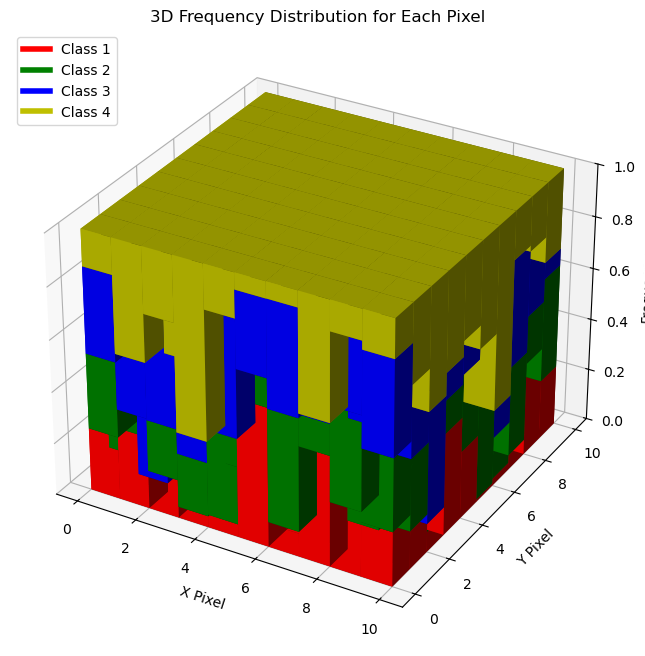

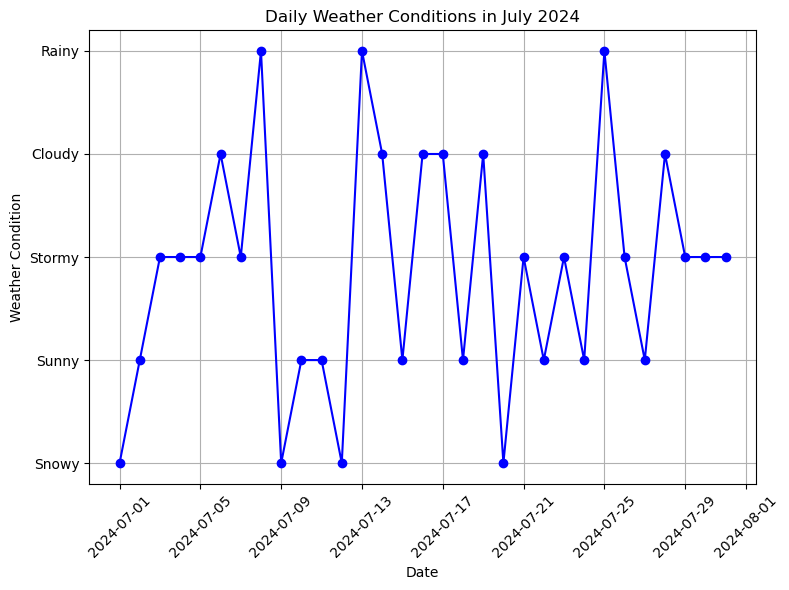

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example of discrete categorical time series data: Daily weather conditions

# Creating a sample time series data for daily weather conditions over a month
dates = pd.date_range(start='2024-07-01', periods=31, freq='D')
weather_conditions = ['Sunny', 'Cloudy', 'Rainy', 'Stormy', 'Snowy']

# Generating random weather conditions for each day
np.random.seed(0)
conditions = np.random.choice(weather_conditions, size=len(dates))

# Creating a DataFrame
weather_data = pd.DataFrame({
    'Date': dates,
    'Condition': conditions
})

# Plotting the time series data
plt.figure(figsize=(8, 6))
plt.plot(weather_data['Date'], weather_data['Condition'], linestyle='-', marker='o', color='blue')
plt.title('Daily Weather Conditions in July 2024')
plt.xlabel('Date')
plt.ylabel('Weather Condition')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()